# CALC I 06 Partial Derivatives
**References**

My Calculus learning notebook following the live lesson series by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and from Jon's notebooks and learning materials. The lesson and original notebook source code at:  
- https://learning.oreilly.com/videos/calculus-for-machine/9780137398171/
- https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb 

In [1]:
import numpy as np
import torch
import math # for constant pi
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('here')

Mounted at here


## 6.1 Derivatives of Multivariate Functions

https://www.geogebra.org/3d

Enables the calculation of derivatives of multivariate equations.

Consider the equation $z = x^2 - y^2$
- There are two variables in the equation. 
- When we plot it and look at the graph, we can see the derivative for each variable. 

(-0.5, 881.5, 582.5, -0.5)

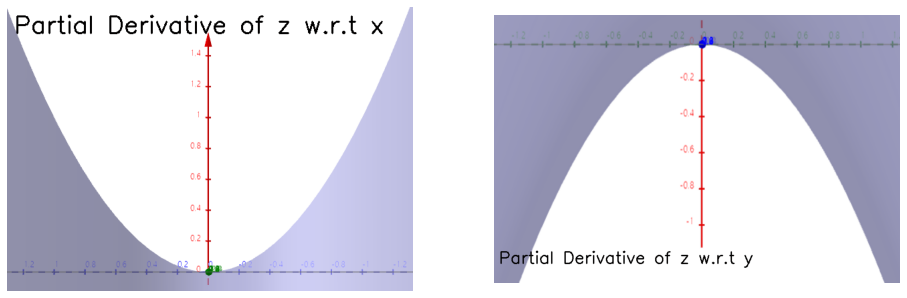

In [ ]:
# partial derivative of z with respect to x and y
pathx = "/content/derivativezx.png"
pathy = "/content/derivativezy.png"

img_zx = cv2.imread(pathx)
img_zx = cv2.putText(img_zx, "Partial Derivative of z w.r.t x", org=(10, 40), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.2, color=1, thickness=2)
img_zy = cv2.imread(pathy)
img_zy = cv2.resize(img_zy, dsize=(0,0), fx=1.5, fy=1.7)
img_zy = cv2.putText(img_zy, "Partial Derivative of z w.r.t y", org=(10, 540), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.2, color=1, thickness=2)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].imshow(img_zx)
ax[0].axis('off')
ax[1].imshow(img_zy)
ax[1].axis('off')

The partial derivative of $z$ w.r.t. $x$ is obtained by considering $y$ to be a constant.  

$$z = x^2 - y^2$$  
$$\frac{\delta z}{\delta x} = 2x - 0 = 2x$$

Because when we compute the derivative of a constant, it simply becomes zero. (derivative is derived from variables, not constants cause there is no change in the latter).

Define a function&emsp;  $f(x, y)$ &emsp; for &emsp; $z = x^2 - y^2$

In [ ]:
def f(x, y):
  return x**2 - y**2

Plot $z$ w.r.t. $x$ by varying $x$.

In [ ]:
xs = np.linspace(-3,3,1000)

... while holding $y$ constant (e.g., at $y=0$):

In [ ]:
zs_wrt_x = f(xs, 0)

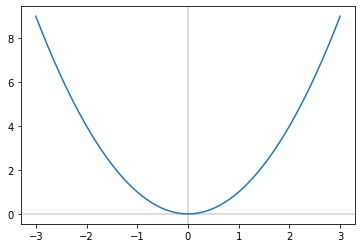

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
ax.plot(xs, zs_wrt_x)



To determine the slope of $z$ w.r.t. $x$ at a given point along the curve, we can use the partial derivative from the slides: $$ \frac{\partial z}{\partial x} = 2x$$ 



In [ ]:
def delz_delx(x, y):  # you are passing in y for nothing. There is no place for y! :O !
  return 2*x

In [ ]:
x_samples = np.arange(-2, 3, 1)
x_samples

array([-2, -1,  0,  1,  2])

In [ ]:
colours = ['red', 'firebrick', 'darkred', 'maroon', 'brown']
def point_and_tangent_wrt_x(xs, x, y, f, fprime, col):
  z = f(x, y)   # z = f(x, y)
  plt.scatter(x, z, c=col)

  tangent_m = fprime(x, y)  # Slope is partial derivative of f(x, y) w.r.t. x
  tangent_b = z - tangent_m * x
  tangent_line = tangent_m * xs + tangent_b

  plt.plot(xs, tangent_line, c=col, linestyle='dashed', linewidth=2, label=f'z = {z}')
  plt.legend()

Notes of some thoughts: 
In essence, partial derivative can be understood as a kind of dimensionality reduction because, in this particular example, it turns of one of the two variables off. So the equation that draws something in 3 dimension is brought down to 2 dimension. 

It is like a selective vision - you see only what you want to see. We don't want to see (or think about) $y$ at the moment. So we put it aside even though it's still there. 

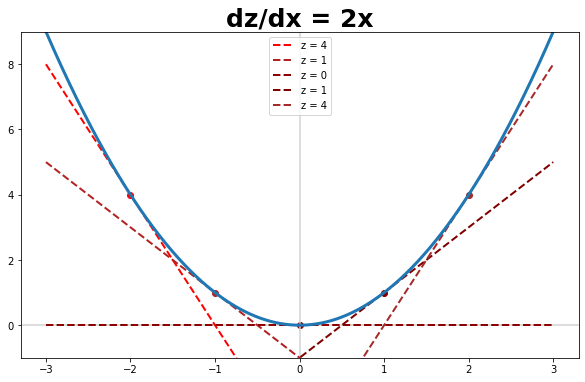

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
  point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colours[i])

plt.ylim(-1, 9)
plt.title("dz/dx = 2x", fontsize=25, fontweight='bold')
ax.plot(xs, zs_wrt_x, linewidth=3)

Interpretatino of the above graph: 
- For each z point, the derivative (slope) is marked in dashed line. For the quadratic equation of $z = x^2 - y^2$ with 3 variables (multivariate), the output ($z$) is computed only with respect to a single input variable ($x$). 


In [ ]:
def visualise(path, size=None):
  img = cv2.imread(path)
  if (size != None):
    img = cv2.resize(img, dsize=(0,0), fx=size[0], fy=size[1])
  cv2_imshow(img)

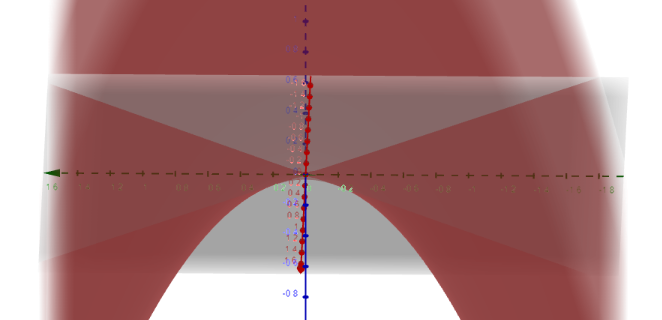

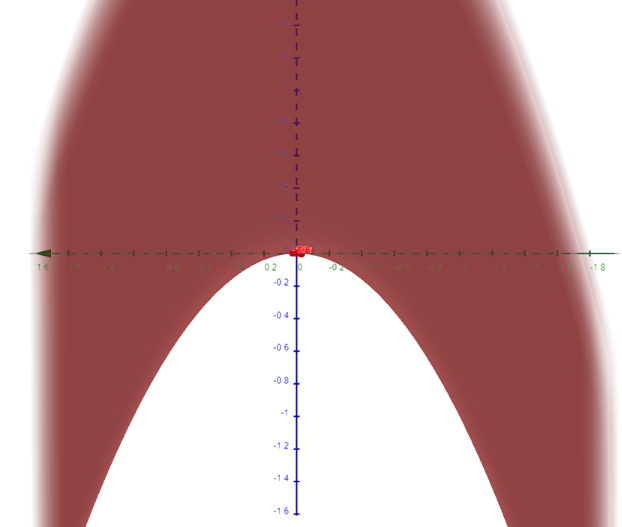

In [ ]:
shape_of_y = "/content/shape of y.png"
y_below_z0 = "/content/y below z0.png"

visualise(shape_of_y, size=(0.75, 0.75))
visualise(y_below_z0, size=(0.75, 0.75))

Using the same principle, we can calculate the partial derivative of y by turning off $x$.

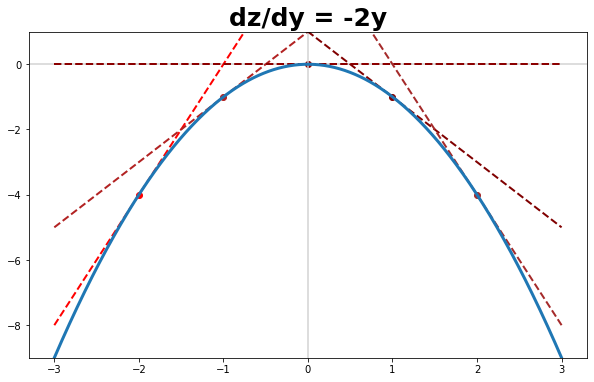

In [ ]:
ys = np.linspace(-3, 3, 1000)
y_samples = np.arange(-2, 3, 1)
colours = ['red', 'firebrick', 'darkred', 'maroon', 'brown']

def f(x, y):
  return x**2 - y**2

def delz_dely(x, y):
  return -2 * y

zs_wrt_y = f(0, ys)

fig, ax = plt.subplots(figsize=(10, 6))
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
  z = f(0, y)   # z = f(x, y)
  plt.scatter(y, z, c=colours[i])

  tangent_m = delz_dely(0, y)  # Slope is partial derivative of f(x, y) w.r.t. x
  tangent_b = z - tangent_m * y
  tangent_line = tangent_m * ys + tangent_b
  plt.plot(ys, tangent_line, c=colours[i], linestyle='dashed', linewidth=2, label=f'z = {z}')

plt.title("dz/dy = -2y", fontsize=25, fontweight='bold')
plt.ylim(-9, 1)
ax.plot(ys, zs_wrt_y, linewidth=3)
plt.savefig("/content/here/MyDrive/Math works/derivative_y.png")

The graph is inverted because of the negative sign before $y$. 

Now let's plot $z$ with respect to $y$ by varying $y$...

In [ ]:
zs_wrt_y = f(0, ys)

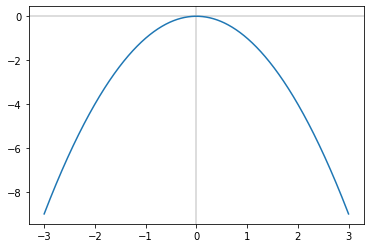

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
ax.plot(ys, zs_wrt_y)

As in the slides, the partial derivative of $z$ w.r.t $y$ happens to be independent of $x$ (just as we observed $x$ is independent of $y$ above), so while $z$ varies as a function of both $x$ and $y$, the slope of $z$ w.r.t $y$ is the same no matter what $x$ is: $$ \frac{\partial z}{\partial y} = -2y $$

So for example, holding $x$ constant at 2 instead of 0 increases $z$, but has no impact whatsoever on the slope of $z$ w.r.t. $y$:


Text(0.5, 1.0, 'z raised by the x constant\nbut there is no effect on the slopes of y.')

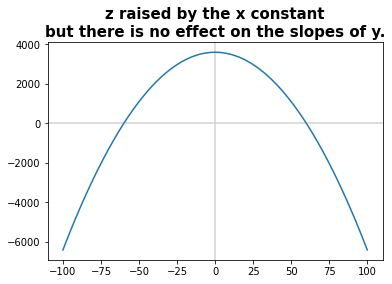

In [ ]:
ys = np.linspace(-100, 100, 10000)
zs_wrt_y = f(60, ys)
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
ax.plot(ys, zs_wrt_y)
ax.set_title('z raised by the x constant\nbut there is no effect on the slopes of y.', 
             fontsize=15, fontweight='bold')

## 6.2 Partial Derivative Exercises



Exercises: Use pencil and paper to determine:

The value of $z$,  
The slope of $z$ with respect to $x$,   
And the slope of $z$ with respect to $y$  

...at the points where:

$x = 3, y = 0$  
$x = 2, y = 3$  
$x = -2, y = -3$

Determining partial derivatives by hand using rules is helpful for understanding how calculus works. In practice, however, autodiff enables us to do so more easily (especially if there are a large number of variables). For example, let's use the PyTorch automatic differentiation library to calculate the slope of $z$ with respect to both $x$ and $y$ at any given point $(x, y, z)$:

In [ ]:
# shows the image immediately. Resize option available
def display_work(path, size=None):
  img = cv2.imread(path)
  if (size != None):
    img = cv2.resize(img, dsize=(0,0), fx=size[0], fy=size[1])
  cv2_imshow(img)

# turns the path into an image object. Resize option available
def get_img(path, size=None):
  img = cv2.imread(path)
  if (size != None):
    img = cv2.resize(img, dsize=(0,0), fx=size[0], fy=size[1])
  return img

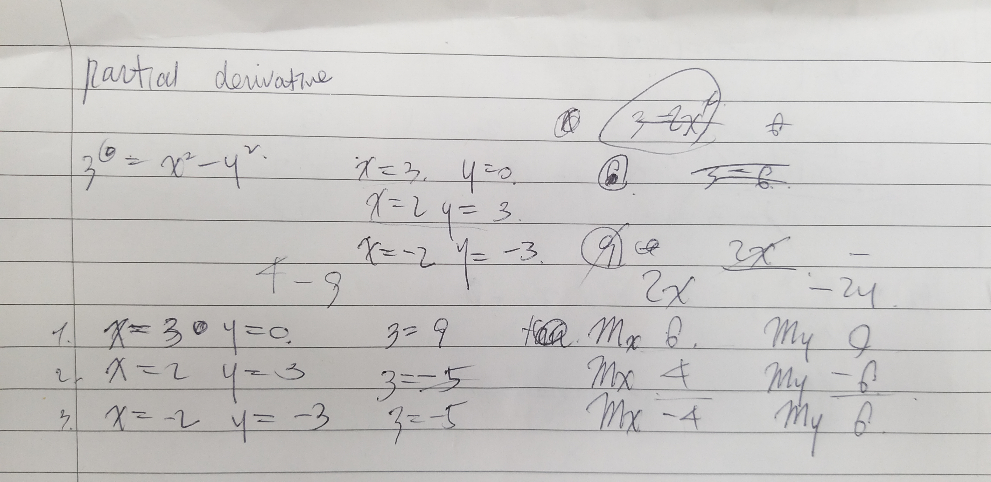

In [ ]:
p_derivs = "/content/here/MyDrive/Math works/partial derivatives.jpg"
p_derivs = get_img(p_derivs, size=(0.175, 0.175))
p_derivs = cv2.rotate(p_derivs, cv2.ROTATE_90_CLOCKWISE)
cv2_imshow(p_derivs)

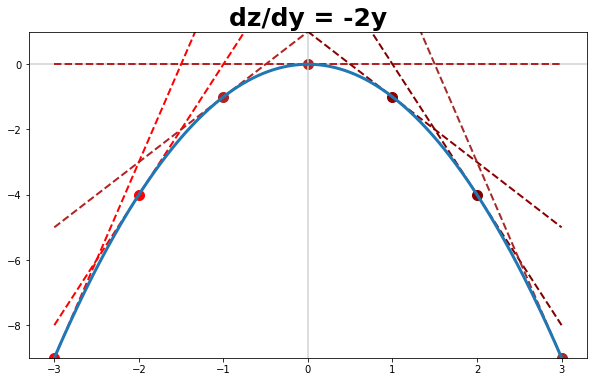

In [ ]:
ys = np.linspace(-3, 3, 1000)
y_samples = np.arange(-3, 4, 1)
colours = ['red', 'red', 'firebrick', 'firebrick', 'darkred', 'maroon', 'brown']

def f(x, y):
  return x**2 - y**2

def delz_dely(x, y):
  return -2 * y

zs_wrt_y = f(0, ys)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
  z = f(0, y)   # z = f(x, y)
  plt.scatter(y, z, c=colours[i], s=100)

  tangent_m = delz_dely(0, y)  # Slope is partial derivative of f(x, y) w.r.t. x
  tangent_b = z - tangent_m * y
  tangent_line = tangent_m * ys + tangent_b
  ax.plot(ys, tangent_line, c=colours[i], linestyle='dashed', linewidth=2, label=f'z = {z}')

plt.title("dz/dy = -2y", fontsize=25, fontweight='bold')
plt.ylim(-9, 1)
ax.plot(ys, zs_wrt_y, linewidth=3)
plt.savefig("/content/here/MyDrive/Math works/derivative_y.png")

In [ ]:
x = torch.tensor(2.).requires_grad_()
x

tensor(2., requires_grad=True)

In [ ]:
y = torch.tensor(3.).requires_grad_()
y

tensor(3., requires_grad=True)

In [ ]:
def f(x, y):
    return x**2 - y**2

z = f(x, y)     # Forward pass
z

tensor(-5., grad_fn=<SubBackward0>)

In [ ]:
z.backward()    # Autodiff
x.grad, y.grad

(tensor(4.), tensor(-6.))

## 6.3 Geometrical Examples
If we are interested in knowing how the volume changes as a function of length ($l$), we can do that by using the partial derivative. 

The derivative of the volumne with respect to the length of the cylinder equals the area of the circle times the derivative of the length.  
$$\frac{\delta v}{\delta l} = \pi r^2 \frac{\delta}{\delta l}(l)$$ 
$$=\pi r^2 (1)$$  
$$=\pi r^2 $$  

In this case we are adjusting the volume with respect to the length. In this case (of multiplication) hoever, the $radius$ $influences$ the length. Both the $radius$ and the $length$ are part of the same term. 

Note the difference in partial derivative calculation in caste of multiplicative terms and additive terms. 
When separate terms are linked to each otehr through addition (or subtraction), they are independent from each other and so do not influence each other. Conversely, elements in a multiplicative term are linked to and dependent on each other because change in one will directly affect the other.



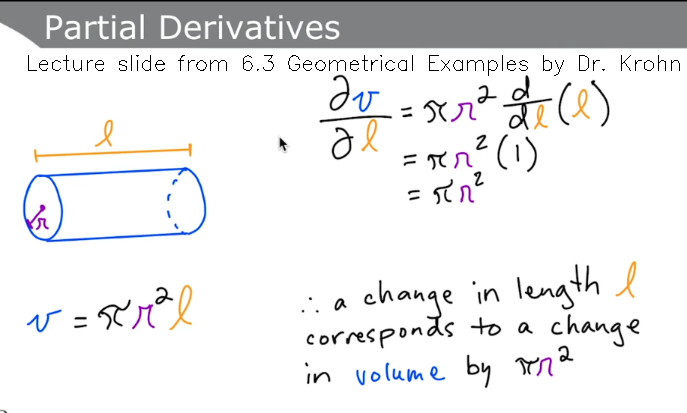

In [ ]:
cylinder = cv2.imread("/content/here/MyDrive/Math works/partial derivatives.png")
cylinder = cv2.resize(cylinder, dsize=(0,0), fx=0.75, fy=0.75)
cylinder = cv2.putText(cylinder, "Lecture slide from 6.3 Geometrical Examples by Dr. Krohn", org=(25, 70),
                       fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=1)
cv2_imshow(cylinder)

Partial Derivatives of a Cylinder's Volume

The volume of a cylinder is described by $v = \pi r^2 l$ &emsp; where:  

- $r$ is the radius of the cylinder  
- $l$ is its length  



In [ ]:
def cylinder_vol(r, l):
    return math.pi *r**2 * l

In [ ]:
# if the radius is 3 meters
r = torch.tensor(3.).requires_grad_()
r

tensor(3., requires_grad=True)

In [ ]:
l = torch.tensor(5.).requires_grad_()
l

tensor(5., requires_grad=True)

In [ ]:
# Then the voulmn of the cylinder is 141.4 cubic meters:
v = cylinder_vol(r, l)
print('v:', v)
v.backward()  # Autodiff backward from v
l.grad

v: tensor(141.3717, grad_fn=<MulBackward0>)


tensor(28.2743)

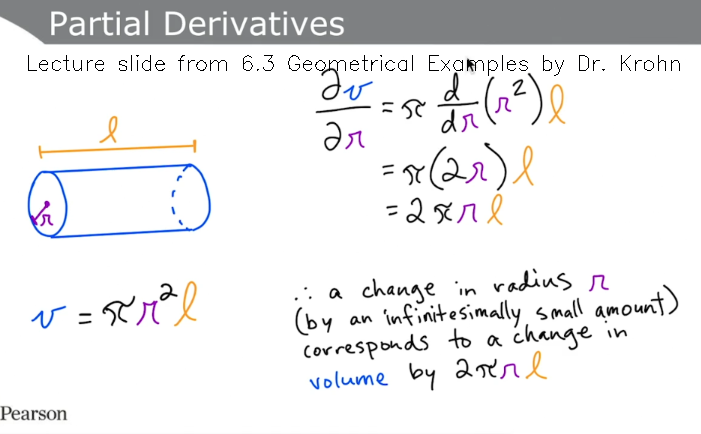

In [ ]:
deriv_r = cv2.imread("/content/here/MyDrive/Math works/cylinder partial derivative_r.png")
deriv_r = cv2.resize(deriv_r, dsize=(0,0), fx=0.75, fy=0.75)
deriv_r = cv2.putText(deriv_r, "Lecture slide from 6.3 Geometrical Examples by Dr. Krohn", org=(25, 70),
                       fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=1)
cv2_imshow(deriv_r)

For changes in $v$ with respect to $r$ we have the following from the slides: $$\frac{\partial v}{\partial r} = 2 \pi r l$$ 



In [ ]:
r.grad

tensor(94.2478)

In [ ]:
manual = 2 * math.pi * 3 * 5
manual

94.24777960769379

$r$ is included in the partial derivative so adjusting it affects the scale of its impact on $v$. Although it's our first example in this notebook, it is typical in calculus for the derivative only to apply at an infinitesimally small $\Delta r$. The smaller the $\Delta r$, the closer to the true $\frac{\partial v}{\partial r}$.  
E.g., at $\Delta r = 1 \times 10^{-6}$:

In [ ]:
delta = 1e-6
auto = (cylinder_vol(3+delta, 5) - cylinder_vol(3, 5)) / delta  # dividing by delta restores scale.
print(auto)
print(np.abs(manual - auto))

94.24779531741478
1.57097209978474e-05


## 6.4 Geometrical Exercises
Find all the partial derivatives of the following functions:
1. $z = y^3 + 5xy$
2. The surface area of a cylinder is described by $a=2 \pi r^2 + 2 \pi r h$.
3. The volume of a square prism with a cube cut out of its center is described by $v=x^2y-z^3$.

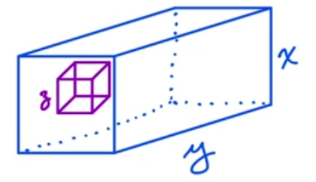

In [ ]:
exercise = cv2.imread("/content/here/MyDrive/Math works/exercise_problem.png")
exercise = cv2.resize(exercise, dsize=(0,0), fx=0.75, fy=0.75)
cv2_imshow(exercise)

### Problem 1. Additive terms 

In [ ]:
def func641(x, y):
    return y**3 + 5*x*y

In [ ]:
xs, ys = np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000)

# y = 0 
def deriv641_x(x, y):
    return 5 * y
z_x = deriv641_x(xs, 0)

# x = 0
def deriv641_y(x, y):
    return 3**y*2 + 5*x
z_y = deriv641_y(0, ys)
z_y

Answer:  
$$\frac{\delta z}{\delta y} = 3y^2 + 5x(1)$$  
$$\frac{\delta z}{\delta x} = 0 + 5y (1)$$

Partial derivative is not about eliminating a specific variable from all terms where it is included; but rather it is about calculating the derivative of a specific term. So if a single term contains multiple variables, it is fine, we keep all of them. 

### Problem 2. Multiplicative terms
$a=2 \pi r^2 + 2 \pi r h$.

In [ ]:
# Wrong answer.
delta = 1e-6

def deriv642_r(r):
    return 4 * math.pi * r

def deriv642_h(h, r):
    return 2 * math.pi * r

r, h = np.arange(1, 11, 2), np.arange(1, 11, 2)

for value in r:
    print(deriv642_r(value), end='\t')
print()
for valh, valr in zip(h, r):
    print(deriv642_h(valh, valr), end='\t')

12.566370614359172	37.69911184307752	62.83185307179586	87.96459430051421	113.09733552923255	
6.283185307179586	18.84955592153876	31.41592653589793	43.982297150257104	56.548667764616276	

Answer: 
$$\frac{\delta a}{\delta h} = 0 + 2 \pi r (1) = 2 \pi r$$  
$$\frac{\delta a}{\delta r} = 2 \pi (2r) + 2 \pi h (1) = 4 \pi r + 2 \pi h$$

### Problem 3. Multiplicative terms

3. The volume of a square prism with a cube cut out of its center is described by $v=x^2y-z^3$.

In [2]:
def deriv643_x(x, y):
    return 2 * x
def deriv634_z(z):
    retrun -3 * z**2

Answer for $v = x^2y - z^3$:

1) Note that y is a constant here. 
$$\frac{\delta v}{\delta x} = 2xy - 0 = 2xy$$

2)
$$\frac{\delta v}{\delta y} = x^2 - 0 =  x^2$$

3)
$$\frac{\delta v}{\delta x} = 0 - 3z^2 =- 3z^2$$





## 6.5 Notation

$$z = f(x, y)$$

$$\frac{\delta z}{\delta z} = \frac{\delta f}{\delta z} = f_x = D_xf$$


The first notation indicates what ($z$) is being differentiated in respect to which variable ($x$ or $y$), but the rest notates in respect to which ($x$ or $y$) only which could be a bit ambiguous.



## 6.6 Chain Rule

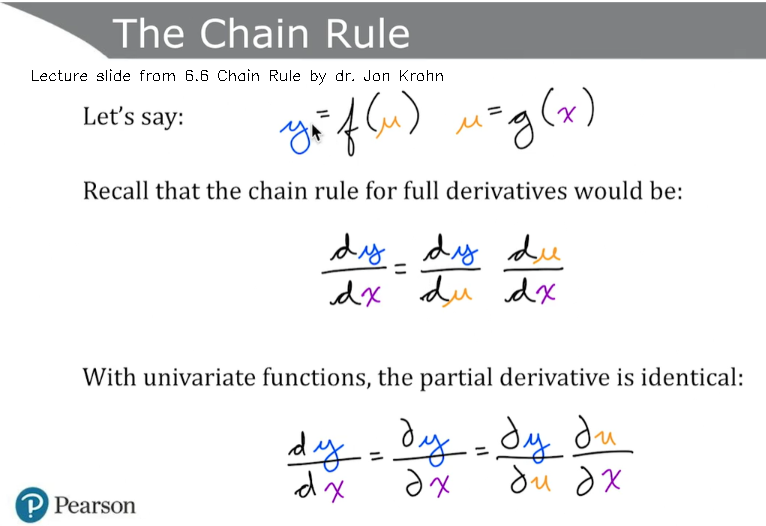

In [11]:
chain_rule_for_partial_derivative = "/content/here/MyDrive/Math works/PD chain rule.png"
chain_rule = cv2.imread(chain_rule_for_partial_derivative)
chain_rule = cv2.resize(chain_rule, dsize=(0,0), fx=0.75, fy=0.75)
chain_rule = cv2.putText(chain_rule, "Lecture slide from 6.6 Chain Rule by dr. Jon Krohn", org=(30, 80), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=1, thickness=1)
cv2_imshow(chain_rule)

- In univariate function, the partial derivative is identical as the full derivative.
- Partial derivatives are designed for multivariate functions.

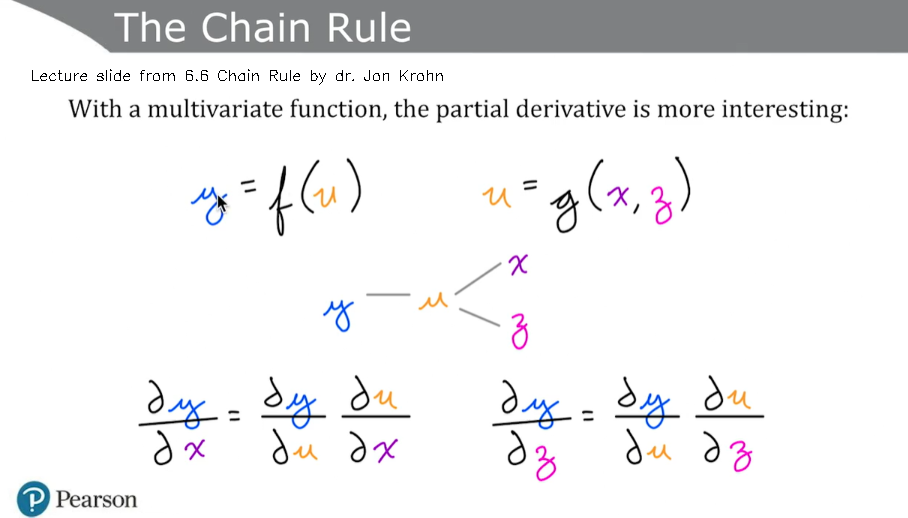

In [13]:
partial_derivative_for_multivariate_func = "/content/here/MyDrive/Math works/PD chain rule for multivariate func.png"
chain_rule = cv2.imread(partial_derivative_for_multivariate_func)
chain_rule = cv2.resize(chain_rule, dsize=(0,0), fx=0.75, fy=0.75)
chain_rule = cv2.putText(chain_rule, "Lecture slide from 6.6 Chain Rule by dr. Jon Krohn", org=(30, 80), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=1, thickness=1)
cv2_imshow(chain_rule)

In this case above, the inner nested function is u as a function of x and z.  
- u is function of y.   
- y is dependent on u.   
    - u, in turn, is dependent on x and z. (multivariate equation)



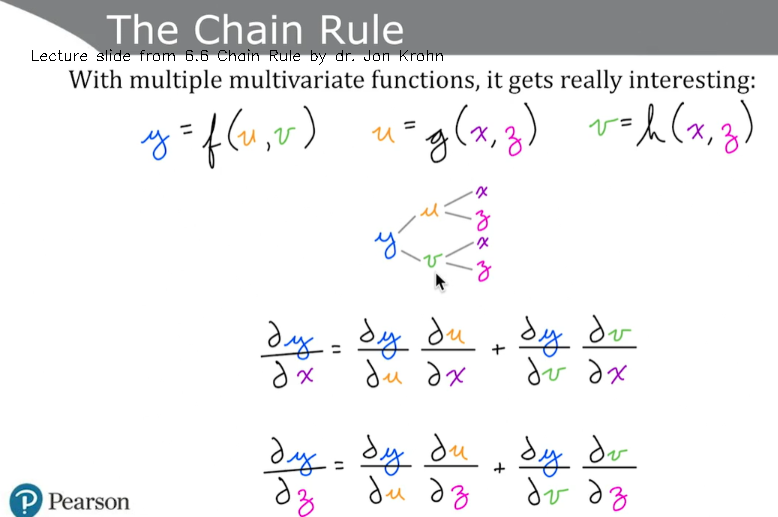

In [24]:
chain_on_muuuuuultivariate_func = "/content/here/MyDrive/Math works/chain on muuultivariate.png"
chain_on_muuuuuulti = cv2.imread(chain_on_muuuuuultivariate_func)
chain_on_muuuuuulti = cv2.resize(chain_on_muuuuuulti, dsize=(0,0), fx=0.75, fy=0.75)
chain_on_muuuuuulti = cv2.putText(chain_on_muuuuuulti, "Lecture slide from 6.6 Chain Rule by dr. Jon Krohn", org=(30, 60), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=1, thickness=1)
cv2_imshow(chain_on_muuuuuulti)

Note that $u$ and $v$ are independent 

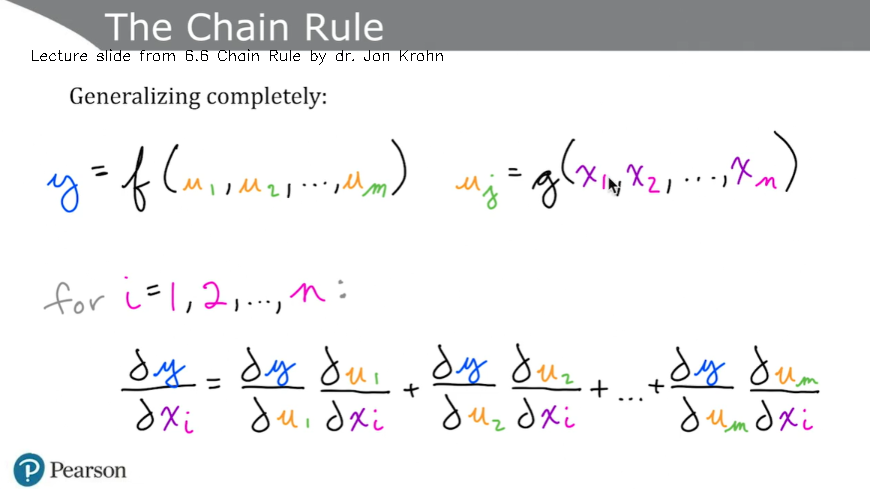

In [25]:
muuuuuultivariate_chain_rule = "/content/here/MyDrive/Math works/multivariate chain rule.png"
muuuuuultivariate_chain_rule = cv2.imread(muuuuuultivariate_chain_rule)
muuuuuultivariate_chain_rule = cv2.resize(muuuuuultivariate_chain_rule, dsize=(0,0), fx=0.75, fy=0.75)
muuuuuultivariate_chain_rule = cv2.putText(muuuuuultivariate_chain_rule, 
                                           "Lecture slide from 6.6 Chain Rule by dr. Jon Krohn", org=(30, 60), 
                                           fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=1, thickness=1)
cv2_imshow(muuuuuultivariate_chain_rule)

## 6.7 Chain Rule Exercises

Find all the partial derivatives of $y$, where:   
1) 
$$y = f(u, v),  u=g(x), v=h(z)$$
2) 
$$y = f(u, v),  u=g(x), v=h(x, z)$$
3) 
$$y = f(u, v, w),  u=g(x), v=h(x), w = j(x)$$

Answers:

1)  $y = f(u, v),  u=g(x), v=h(z)$

$$y -- u -- x$$
$$ㄴ-- v -- z$$

$$\frac{\delta y}{\delta x} = \frac{\delta y}{\delta u}\frac{\delta u}{\delta x}$$

$$\frac{\delta y}{\delta z} = \frac{\delta y}{\delta u}\frac{\delta u}{\delta z}$$

<br />



2) $y = f(u, v),  u=g(x), v=h(x, z)$

$$\frac{\delta y}{\delta x} = \frac{\delta y}{\delta u}\frac{\delta u}{\delta x} + \frac{\delta y}{\delta v}\frac{\delta v}{\delta x}$$

$$\frac{\delta y}{\delta z} = \frac{\delta y}{\delta v}\frac{\delta v}{\delta z}$$

<br />


It's about the specific one variable that we want to calculate the derivative of. But note that the variable can be used in a set of multiple multivariate functions (which make a single function as a whole). Here, each term is a function itself.

Then the specific variable of interest (let's call it $x$) may appear multiple times in multiple different terms in multiple different sub-functions and we have to calculate the value of x across all those terms containing $$.

In [52]:
# Code by Bill Grates on Stackoverflow
# https://stackoverflow.com/users/5629538/bill-grates
# https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv

def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    h, s, v = cv2.split(hsv)
    print(v)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

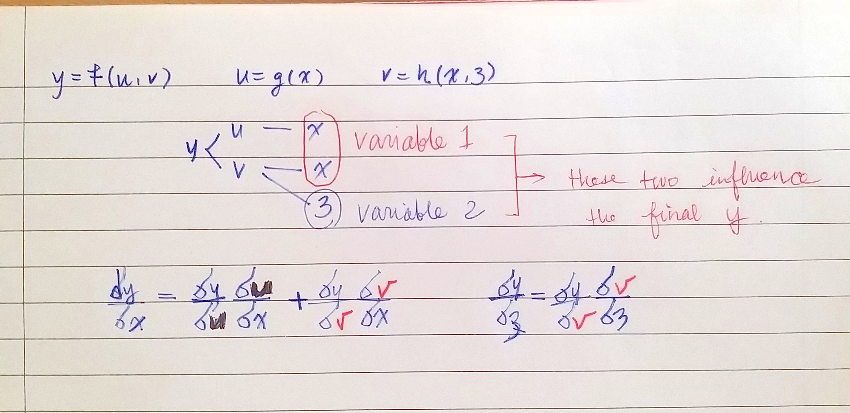

In [48]:
one_variable_in_two_functions = "/content/here/MyDrive/Math works/one_var_in_two_funcs.jpg"
one_var = cv2.imread(one_variable_in_two_functions)
one_var = cv2.resize(one_var, dsize=(0,0), fx=0.15, fy=0.15)
one_var = cv2.rotate(one_var, cv2.ROTATE_90_CLOCKWISE)
one_var = increase_brightness(one_var, value=75)
cv2_imshow(one_var)

3) The partial derivatives in this equation are equal to the full derivative.

<br/>

$$y = f(u, v, w),  u=g(x), v=h(x), w = j(x)$$

<br/>

$$\frac{\delta y}{\delta x} = \frac{\delta y}{\delta u}\frac{\delta u}{\delta x}+ \frac{\delta y}{\delta v}\frac{\delta v}{\delta x} + \frac{\delta y}{\delta w}\frac{\delta w}{\delta x}$$

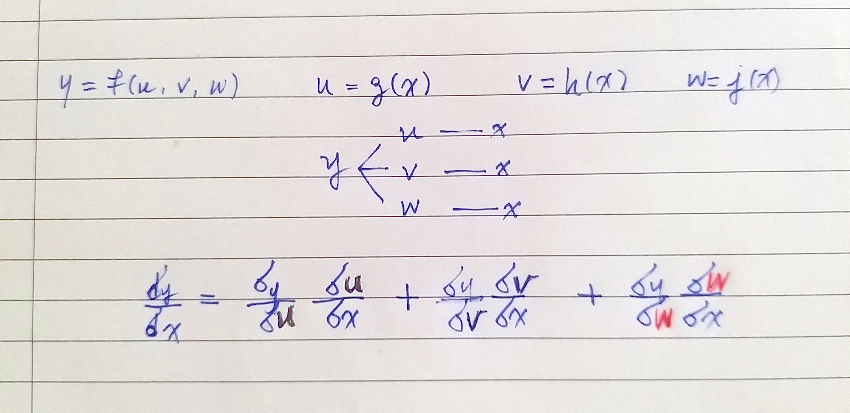

In [49]:
equal_full_partial_derivative = "/content/here/MyDrive/Math works/full_partial_equal.jpg"
eq = cv2.imread(equal_full_partial_derivative)
eq = cv2.resize(eq, dsize=(0,0), fx=0.15, fy=0.15)
eq = cv2.rotate(eq, cv2.ROTATE_90_CLOCKWISE)
eq = increase_brightness(eq, value=75)
cv2_imshow(eq)

# Frequent Functions
- ```cv2.putText(img, "text", org=(0, 15), fontFace=cv2.FONT_, fontScale=1, color=1, thickness=1)```  

  https://github.com/Coding-Forest/2021-Mathematics/blob/main/03%20Calculus%20for%20ML%20(Jon%20Krohn)/CALC%20I%2005%20Automatic%20Differentiation.ipynb

- increase brightness
    - 
    https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv

# Error Notes
